# Week 5 Practical

## Fitting a power law
Power-law distributions occur in various scientific contexts and are significant for understanding both natural and man-made phenomena. The probability distribution is given by $$p(x) \propto x^{-\alpha}$$
, where $$\alpha$$
 is the exponent or scaling parameter. For real-world data, $$\alpha$$
 typically lies between 2 and 3.

In [1]:
import networkx as nx

# Load the citation network data
citation_file = "data/hep-th-citations.txt"
date_file = "data/hep-th-slacdates.txt"

# Create an empty graph
G = nx.DiGraph()

# Read the citation data and add edges to the graph
with open(citation_file, "r") as f:
  for line in f:
    source, target = line.strip().split()
    G.add_edge(source, target)

# Read the date data and add attributes to the graph
with open(date_file, "r") as f:
  for line in f:
    node, date = line.strip().split()
    if node in G.nodes:
      G.nodes[node]["date"] = date

[10, 16, 115, 140, 55, 421, 77, 1299, 1006, 126, 1114, 337, 192, 30, 63, 327, 205, 49, 189, 77, 160, 301, 90, 192, 35, 175, 92, 329, 49, 95, 520, 252, 194, 148, 274, 467, 148, 24, 110, 118, 186, 127, 28, 81, 65, 145, 139, 37, 114, 62, 63, 59, 49, 424, 29, 70, 71, 65, 39, 11, 16, 43, 16, 139, 8, 17, 129, 14, 22, 17, 11, 22, 328, 24, 14, 12, 11, 54, 23, 22, 18, 11, 5, 5, 43, 83, 21, 13, 14, 2, 4, 106, 208, 30, 11, 11, 79, 56, 50, 230, 223, 168, 1032, 135, 29, 109, 115, 64, 53, 35, 47, 125, 108, 49, 232, 171, 211, 137, 96, 37, 32, 15, 21, 1, 3, 1, 52, 32, 43, 121, 13, 8, 68, 5, 43, 25, 50, 52, 36, 94, 102, 84, 26, 33, 46, 10, 29, 1, 12, 51, 69, 25, 6, 2, 4, 8, 36, 113, 27, 23, 1, 4, 12, 120, 28, 33, 29, 82, 4, 775, 1199, 327, 44, 43, 24, 133, 788, 2414, 119, 2, 33, 55, 17, 251, 48, 60, 1144, 61, 69, 37, 13, 26, 23, 188, 55, 25, 85, 21, 25, 21, 16, 24, 13, 93, 111, 191, 9, 4, 3, 6, 13, 22, 12, 5, 12, 5, 5, 8, 8, 84, 149, 1641, 1775, 295, 233, 49, 76, 7, 177, 21, 74, 27, 7, 11, 5, 94, 5, 28

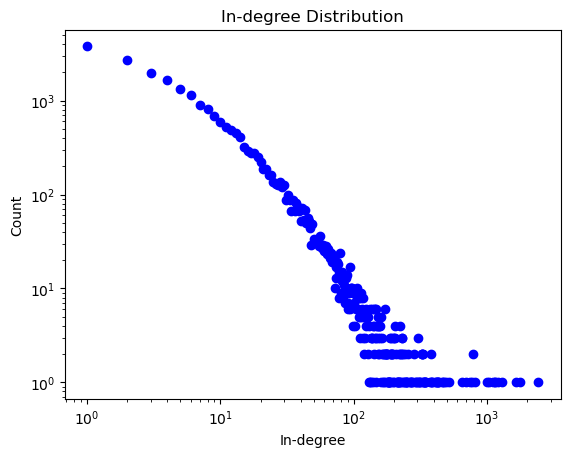

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the in-degree distribution
in_degrees = [G.in_degree(node) for node in G.nodes() if G.in_degree(node) !=0]
# in-degree is the number of edges coming into a node
print(in_degrees)
# In-degree distribution
degree_counts = pd.Series(in_degrees).value_counts().sort_index()

# Plot the in-degree distribution on a log-log scale
degrees = list(degree_counts.index)
counts = list(degree_counts.values)

plt.loglog(degrees, counts, 'bo')
plt.xlabel('In-degree')
plt.ylabel('Count')
plt.title('In-degree Distribution')
plt.show()

In [4]:
# Note that xi is the individual vertice 
import math

# Print the number of nodes and edges in the graph 
def calculate_mle_estimator(x, xmin):
  n = len(x)
  sum_ln = sum([math.log(xi / xmin) for xi in x])
  alpha_hat = 1 + n / sum_ln
  return alpha_hat

# Extract the in-degrees of the citation network
in_degrees = [G.in_degree(node) for node in G.nodes() if G.in_degree(node) != 0]

# Calculate the MLE estimator of the power law distribution
alpha_hat = calculate_mle_estimator(in_degrees, min(in_degrees))
print("MLE estimator of the power law distribution:", alpha_hat)

MLE estimator of the power law distribution: 1.556534662072066


### Degrees are discrete values, but it give the almost the same result, so we prentend the values are continous. 

In [6]:
import powerlaw
import numpy as np

# Check for any invalid values in your data
in_degrees = np.array(in_degrees)
in_degrees = in_degrees[in_degrees > 0]  # Remove zero or negative values

# Fit power law to in-degree distribution
results = powerlaw.Fit(in_degrees)

# Get the estimated scaling exponent
alpha_hat = results.power_law.alpha
print("MLE estimator of the power law distribution:", alpha_hat)


MLE estimator of the power law distribution: 2.710442816883133


Calculating best minimal value for power law fit


In [9]:
import pandas as pd

# Convert the in_degrees list/array to a pandas Series
in_degrees_series = pd.Series(in_degrees)

# Find the indices where the value is 0
zero_indices = in_degrees_series.loc[in_degrees_series == 0].index
print(zero_indices)

Index([], dtype='int64')


In [10]:
# Extract the xmin value from the powerlaw fit
xmin = results.power_law.xmin
print("xmin:", xmin)

# Remove values smaller than xmin
filtered_degrees = [degree for degree in in_degrees if degree >= xmin]

# Calculate the MLE estimator of the scaling exponent
alpha_hat = calculate_mle_estimator(filtered_degrees, xmin)
print("MLE estimator of the scaling exponent:", alpha_hat)

xmin: 53.0
MLE estimator of the scaling exponent: 2.710442816883133


In [15]:
import powerlaw

# Fit power law to in-degree distribution
results = powerlaw.Fit(in_degrees, discrete=True)

# Get the estimated scaling exponent
exponent = results.power_law.alpha

# Print the scaling exponent
print("Scaling exponent:", exponent)

Scaling exponent: 2.695355629423953


Calculating best minimal value for power law fit


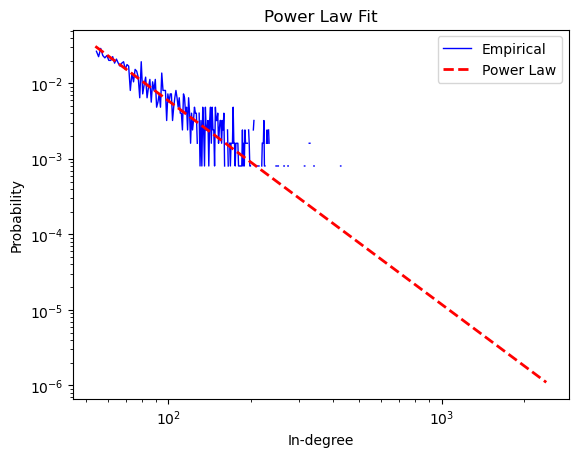

In [16]:
# Visualize the power law fit
fig = results.plot_pdf(color='b', linewidth=1, linear_bins=True)
results.power_law.plot_pdf(color='r', linestyle='--', linewidth=2, ax=fig)
plt.xlabel('In-degree')
plt.ylabel('Probability')
plt.title('Power Law Fit')
plt.legend(['Empirical', 'Power Law'])
plt.show()

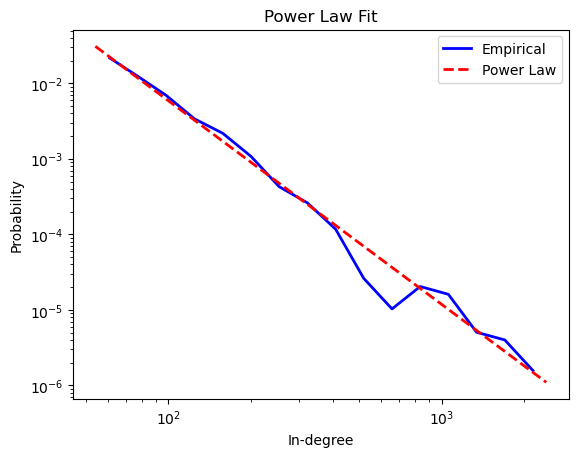

In [14]:
# Visualize the power law fit
fig = results.plot_pdf(color='b', linewidth=2, linear_bins=False)
results.power_law.plot_pdf(color='r', linestyle='--', linewidth=2, ax=fig)
plt.xlabel('In-degree')
plt.ylabel('Probability')
plt.title('Power Law Fit')
plt.legend(['Empirical', 'Power Law'])
plt.show()

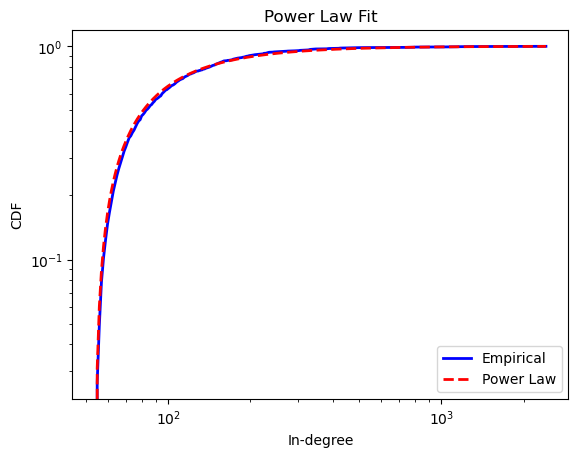

In [17]:
# Visualize the power law fit
fig = results.plot_cdf(color='b', linewidth=2)
results.power_law.plot_cdf(color='r', linestyle='--', linewidth=2, ax=fig)
plt.xlabel('In-degree')
plt.ylabel('CDF')
plt.title('Power Law Fit')
plt.legend(['Empirical', 'Power Law'])
plt.show()

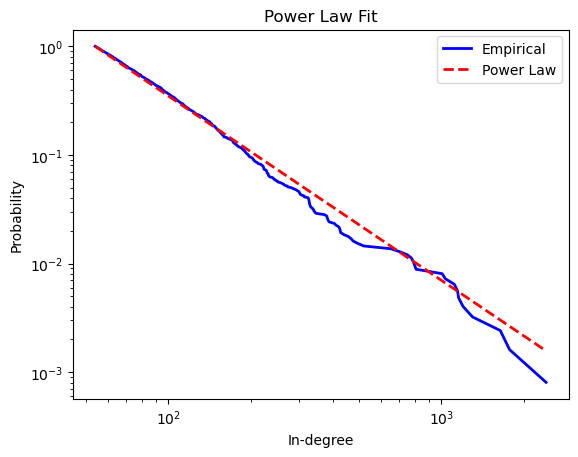

In [18]:
# Visualize the power law fit
fig = results.plot_ccdf(color='b', linewidth=2)
results.power_law.plot_ccdf(color='r', linestyle='--', linewidth=2, ax=fig)
plt.xlabel('In-degree')
plt.ylabel('Probability')
plt.title('Power Law Fit')
plt.legend(['Empirical', 'Power Law'])
plt.show()

In [20]:
import pandas as pd
import networkx as nx

# Read the CSV files into pandas dataframes
vertices_df = pd.read_csv('data/gridkit_europe-highvoltage-vertices.csv')
links_df = pd.read_csv('data/gridkit_europe-highvoltage-links.csv')

# Create an empty graph
G = nx.Graph()

# Add vertices with attributes
for index, row in vertices_df.iterrows():
  v_id = row['v_id']
  G.add_node(v_id, **dict(row))

# Add edges with attributes
for index, row in links_df.iterrows():
  v_id_1 = row['v_id_1']
  v_id_2 = row['v_id_2']
  G.add_edge(v_id_1, v_id_2, **dict(row))

# Print the graph
print(G)

Graph with 13871 nodes and 17277 edges


In [21]:
import random
import math

# Calculate the number of nodes and edges in the European power grid
# Calculate the average degree
num_nodes = len(G.nodes)
num_edges = len(G.edges)
average_degree = 2 * num_edges / num_nodes

# Calculate the edge density
edge_density = 2 * num_edges / num_nodes

# Calculate the radius of the random geometric graph
radius = math.sqrt(average_degree / num_nodes / math.pi)

# Create a random geometric graph on a unit square
random_graph = nx.random_geometric_graph(num_nodes, radius, dim=2)

# Print the random geometric graph
print(random_graph)

Graph with 13871 nodes and 17222 edges


In [22]:
# Calculate the cluster coefficient (transitivity) of the European power grid
transitivity_european = nx.transitivity(G)

# Calculate the cluster coefficient (transitivity) of the random geometric graph
transitivity_random = nx.transitivity(random_graph)

# Print the cluster coefficient (transitivity) of the European power grid and the random geometric graph
print("Cluster coefficient (transitivity) of the European power grid:", transitivity_european)
print("Cluster coefficient (transitivity) of the random geometric graph:", transitivity_random)

Cluster coefficient (transitivity) of the European power grid: 0.1000669792364367
Cluster coefficient (transitivity) of the random geometric graph: 0.5930772381775977


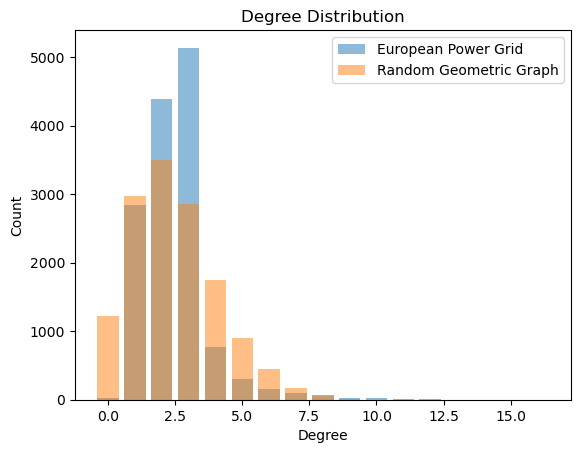

In [23]:
import matplotlib.pyplot as plt

# Calculate the degree distribution of the European power grid
degree_sequence_european = [degree for _, degree in G.degree()]
degree_counts_european = dict()
for degree in degree_sequence_european:
  if degree in degree_counts_european:
    degree_counts_european[degree] += 1
  else:
    degree_counts_european[degree] = 1

# Calculate the degree distribution of the random geometric graph
degree_sequence_random = [degree for _, degree in random_graph.degree()]
degree_counts_random = dict()
for degree in degree_sequence_random:
  if degree in degree_counts_random:
    degree_counts_random[degree] += 1
  else:
    degree_counts_random[degree] = 1

# Plot the degree distribution of the European power grid
plt.bar(degree_counts_european.keys(), degree_counts_european.values(), alpha=0.5, label='European Power Grid')

# Plot the degree distribution of the random geometric graph
plt.bar(degree_counts_random.keys(), degree_counts_random.values(), alpha=0.5, label='Random Geometric Graph')

# Set the labels and title
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Distribution')
plt.legend()

# Show the plot
plt.show()

In [ ]:
n 